### **LGM VIP Task: Develop A Neural Network That Can Read Handwriting**

**Executed by: Kriti Yadav | ykriti288@gmail.com**

### **Importing the necessary libraries**

In [1]:
import tensorflow as tf
from numpy import unique, argmax
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np


### **Load Dataset**

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


### **Reshaping the trainning and testing dataset**

In [3]:
x_train =x_train.reshape((x_train.shape[0] ,x_train.shape[1], x_train.shape[2],1))
x_test =x_test.reshape((x_test.shape[0] ,x_test.shape[1], x_test.shape[2],1))

### **Normalize the value of pixels in images**

In [4]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

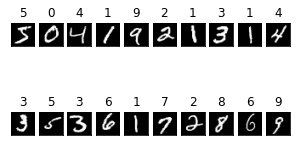

In [5]:
fig=plt.figure(figsize=(5,3))
for i in range(20):
  ax =fig.add_subplot(2,10,i+1 ,xticks=[] ,yticks=[])
  ax.imshow(np.squeeze(x_train[i]), cmap='gray')
  ax.set_title(y_train[i])

### **Determine the shape of input image**

In [6]:

img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

### **Defining the model**

In [7]:
import tensorflow as tf


model = tf.keras.models.Sequential([

  tf.keras.layers.Flatten(input_shape=(28, 28)),

  tf.keras.layers.Dense(128, activation='relu'),

  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(10)

])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


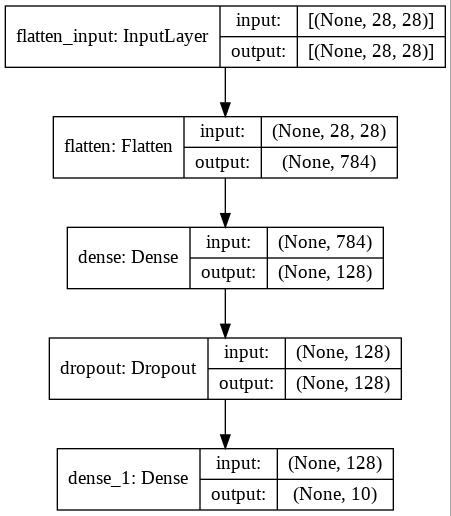

In [9]:
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.jpg', show_shapes=True)

In [10]:
predictions = model(x_train[:1]).numpy()

predictions

array([[-3.5757399e-01, -7.0344657e-05,  7.3399894e-02, -2.7220210e-01,
         1.1243354e-01, -2.3004319e-01, -1.0353078e-01, -8.7883718e-02,
         1.9695957e-01, -2.4611716e-01]], dtype=float32)

In [11]:

tf.nn.softmax(predictions).numpy()

array([[0.07546327, 0.10789404, 0.11611951, 0.0821887 , 0.1207417 ,
        0.08572777, 0.09728932, 0.09882358, 0.13139126, 0.0843608 ]],
      dtype=float32)

### **Compling The Model**

In [12]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam',loss=loss_fn, metrics=['accuracy'])

### **Train the model**

In [13]:

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2944 - accuracy: 0.9138
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1405 - accuracy: 0.9588
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1062 - accuracy: 0.9677
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0868 - accuracy: 0.9735
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0760 - accuracy: 0.9764


### **Model Evaluation**

In [14]:
model.evaluate(x_test,  y_test, verbose=5)

[0.07474728673696518, 0.9772999882698059]

### **Probablity of the model**

In [15]:
probability_model = tf.keras.Sequential([ model, tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.5572330e-08, 2.9824702e-11, 2.1591109e-06, 2.4979081e-05,
        4.5095867e-12, 2.2818227e-09, 2.1418389e-15, 9.9997270e-01,
        6.8810455e-09, 1.5721375e-07],
       [3.2685252e-09, 2.5890489e-05, 9.9997151e-01, 1.0733203e-06,
        1.3899417e-19, 3.6172793e-07, 3.7872407e-09, 4.0080711e-14,
        1.1432431e-06, 4.2080441e-16],
       [1.2046000e-06, 9.9643683e-01, 2.2963103e-04, 3.7210939e-05,
        1.3667864e-05, 2.0871854e-05, 2.3356070e-05, 2.9685632e-03,
        2.6827186e-04, 4.4058044e-07],
       [9.9995208e-01, 5.1880750e-10, 3.8257956e-05, 4.8308840e-07,
        7.8559950e-08, 3.1339553e-07, 2.4683238e-06, 4.0809459e-06,
        1.8560334e-07, 2.0041950e-06],
       [7.7583918e-06, 9.4866666e-09, 1.2274313e-05, 1.1449747e-07,
        9.9794084e-01, 2.7081137e-08, 4.9238788e-06, 4.7817968e-05,
        2.3972684e-06, 1.9838784e-03]], dtype=float32)>

### **Testing the model**

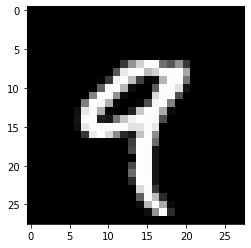

In [16]:

img = x_train[4]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [17]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

predicted : 9


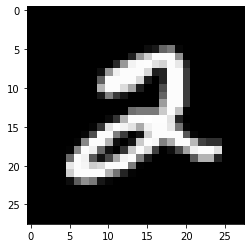

In [18]:
img = x_train[5]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [19]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

predicted : 2


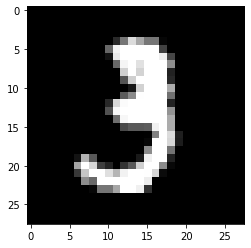

In [20]:
img = x_train[10]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [21]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

predicted : 3
